# **Movie Genres Classification**
*Predicting the genre of movie from just 1000 characters of the script.*

*Dataset Link: https://www.kaggle.com/c/moviegenres/overview*

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('kaggle_movie_train.csv')

# **Exploring the dataset**

In [3]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [4]:
df.shape

(22579, 3)

In [5]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [6]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

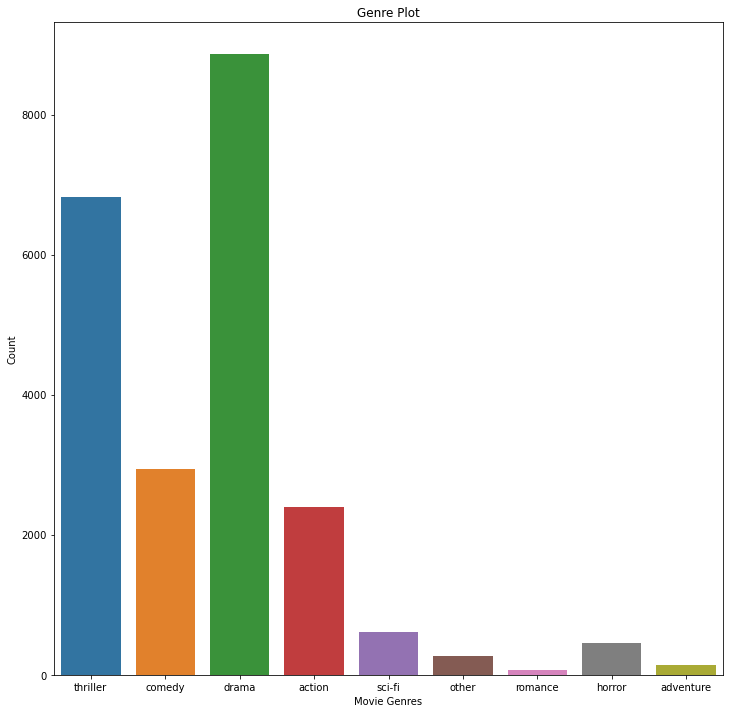

In [7]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# **Data Cleaning and Preprocessing**

In [8]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [9]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [10]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [11]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [12]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [13]:
df.shape

(22579, 2)

In [14]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [15]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [16]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [17]:
len(corpus)

22579

In [18]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

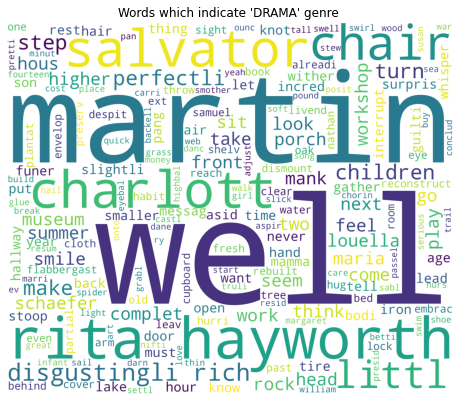

In [19]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

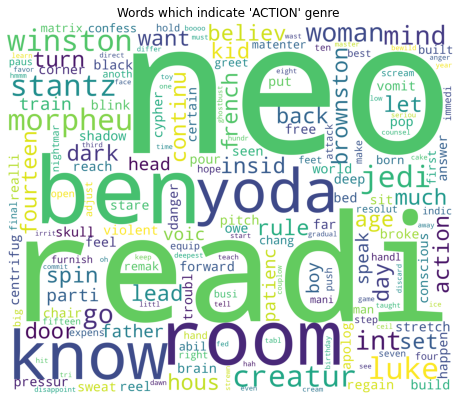

In [20]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

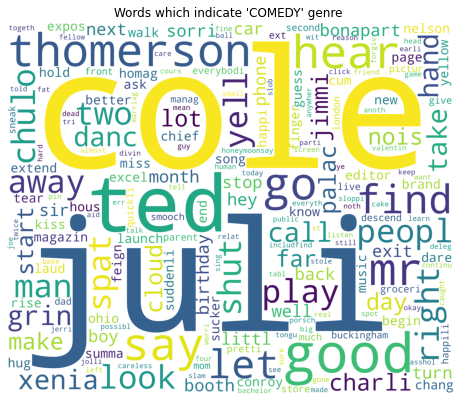

In [21]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [22]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [23]:
y = df['genre'].values

# **Model Building**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## *Multinomial Naive Bayes*

In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [26]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [27]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.55%


In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [29]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   4,   41,    1,   37, 1607,   21,    1,   11,  104],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   12,    0,   22, 1172]],
      dtype=int64)

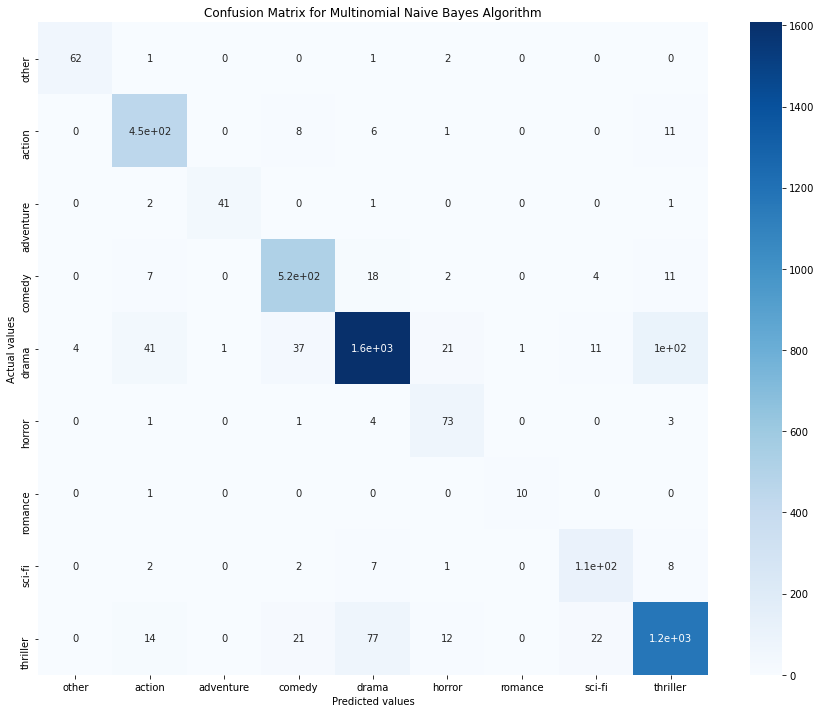

In [30]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [31]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.32%
Accuracy score for alpha=0.2 is: 91.03%
Accuracy score for alpha=0.3 is: 90.79%
Accuracy score for alpha=0.4 is: 90.54%
Accuracy score for alpha=0.5 is: 90.21%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 89.99%
Accuracy score for alpha=0.8 is: 89.9%
Accuracy score for alpha=0.9 is: 89.73%
Accuracy score for alpha=1.0 is: 89.55%
--------------------------------------------
The best accuracy is 91.32% with alpha value as 0.1


In [32]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# **Predictions**

In [33]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [34]:
# For generating random integer
from random import randint

In [35]:
# Loading test dataset
test = pd.read_csv('kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [36]:
test.shape

(5589, 2)

In [37]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [38]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: seats. GALE Can you... can you get me out of here? BERNIE pans the light back to the purse again. BERNIE Yeah, sure. I think. BERNIE puts down the light and struggles her leg loose while GALE groans in pain. Her head is near the floor lights, her eyes open. For a moment BERNIE'S face passes through the stationary beam of the flashlight and GALE gets a glimpse of a smoky, muddy face leaning close to her...AN OBSCURE VISION! BERNIE Okay, lady. You gotta make an effort here. I don't happen to be a goddamn bodybuilder. BERNIE retrieves the flashlight lying near her purse. It's out of her line of vision, behind her head. He only hesitates for half a second before his hand shoots out for the purse, conceals it under his jacket, and gets to his feet. INT. EXIT AREA MAIN CABIN 727 SECONDS LATER NIGHT LESLIE is helping ANOTHER MAN out the exit. LESLIE Get away from the plane quickly. It may explode. Now she's alone. Heroically she turns back and probes the smoky interior with her flashl

In [39]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: the fleeing trio, then close ranks in front of him. Is it accidental, or are the pedestrians working together, running interference? TRUMAN shouting at the pedestrians Outta the way! Outta the way! They are escaping. Truman finally breaks through the pack, bowling over several of the pedestrians in the process. Just as he gets within reach of the shopper and the businessman, a bus suddenly screeches to a halt beside the abductors, doors already open. The Woman Shopper and the Executive bundle the Homeless Man onto the bus. Truman lurches after them, but he is met by the bus doors, closing sharply in his face. TRUMAN to BUS DRIVER Hey, stop! Stop the bus!! Truman thumps against the doors, but the BUS DRIVER ignores his cries and the bus roars away. The other PASSENGERS in the bus, apparently oblivious to the incident, keeps staring straight ahead. Truman continues to give chase when a taxi appears out of nowhere and cuts in front of him, blocking his path. When he recovers, the 

In [40]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: p in that hotel room, and leave nothing out no matter how implausible. INT. UNDERWORLD DARK CHAMBER NIGHT DOCTOR SCHREBER is led into the room by Mister Hand. The doctor sits at the head of a boardroom style table. He's cold, pulls his coat up about his neck. The long table is lined on both sides with immobile STRANGERS. A DARK FIGURE walks into the room, steps to the other end of the table. It's MISTER BLACK. MISTER BLACK to Strangers Gentlemen. peers at Schreber Doctor. He sits. MISTER BLACK Cont. It is clear to you we are unhappy, yes? SCHREBER Yes, of course. I... Mister Black waves his hand to silence Schreber who immediately complies. MISTER BLACK We find ourselves in an interesting situation. Our friend is making quite a nuisance of himself. He know things. There is a general murmur of concern amongst the gathered Strangers. MISTER BLACK Cont. Explain to us, Doctor. Why is the situation like this? Yes? Schreber seems distinctly uncomfortable. SCHREBER I'm not certain I u

In [41]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: tain way. And this is...mean spirited! Pause. JOYCE Yeah, well, it did seem a little affected. Like by using taboo language you were trying to shock us about the hollowness of your characters. ETHAN I think it was a little bit racist. ELLI It was completely racist, and beyond that I felt deeply offended as a woman. As if a woman can only operate from experiences of objectification. SUE Totally phallocentric. ELLI And so weirdly misogynistic. I mean, why does Jane go through with this? Is she stupid? ETHAN Hey, But wasn't this a rape? Or ...did I miss something? Because I I'm confused. Because if this was a rape, then why would she be a whore? CATHERINE beat It was confessional, yet dishonest. Jane pretends to be horrified by the sexuality that she in fact fetishizes. She subsumes herself to the myth of black male potency, but then doesn't follow through. She thinks she 'respects Afro Americans,' she thinks they're 'cool,' 'exotic,' what a notch he 'd make in her belt, but, of c

In [42]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: e glass every artery, vein and capillary rip out of Ratan's neck. Ratan collapses against the window frame. TWO OFFICERS, guns drawn, rush toward Ratan's body. The Second Officer pulls out his handcuffs, then realizes it will not be needed. Jake turns and heads toward where he last saw Kristen. The First Officer aims his gun at Jake and calls out FIRST OFFICER Halt! Mast and plainclothes officer Joe Klein , rush over and instruct the Officers to ease off. Jake walks across the now empty bar. Several tables are overturned. Jake walks to the table where Kristen tripped. Following her logical path, Jake walks into the women's rest room. CUT TO INT. REST ROOM NIGHT Kristen squeezes herself against the yellow rest room wall. Trembling, she holds her twisted ankle and looks at her father in fear. Jake takes off his torn coat and drapes it over his daughter's shoulders. She tries not to look at him. KRISTEN Don't hurt me. JAKE Come on, Kristen. Let's go home. He helps her up. CUT TO E

In [43]:
# Creating a pickle file for the CountVectorizer
import pickle
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

In [44]:
# Creating a pickle file for the Multinomial Naive Bayes model with best alpha
filename = 'movie-genre-mnb-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))